# Hotel Booking EDA Report

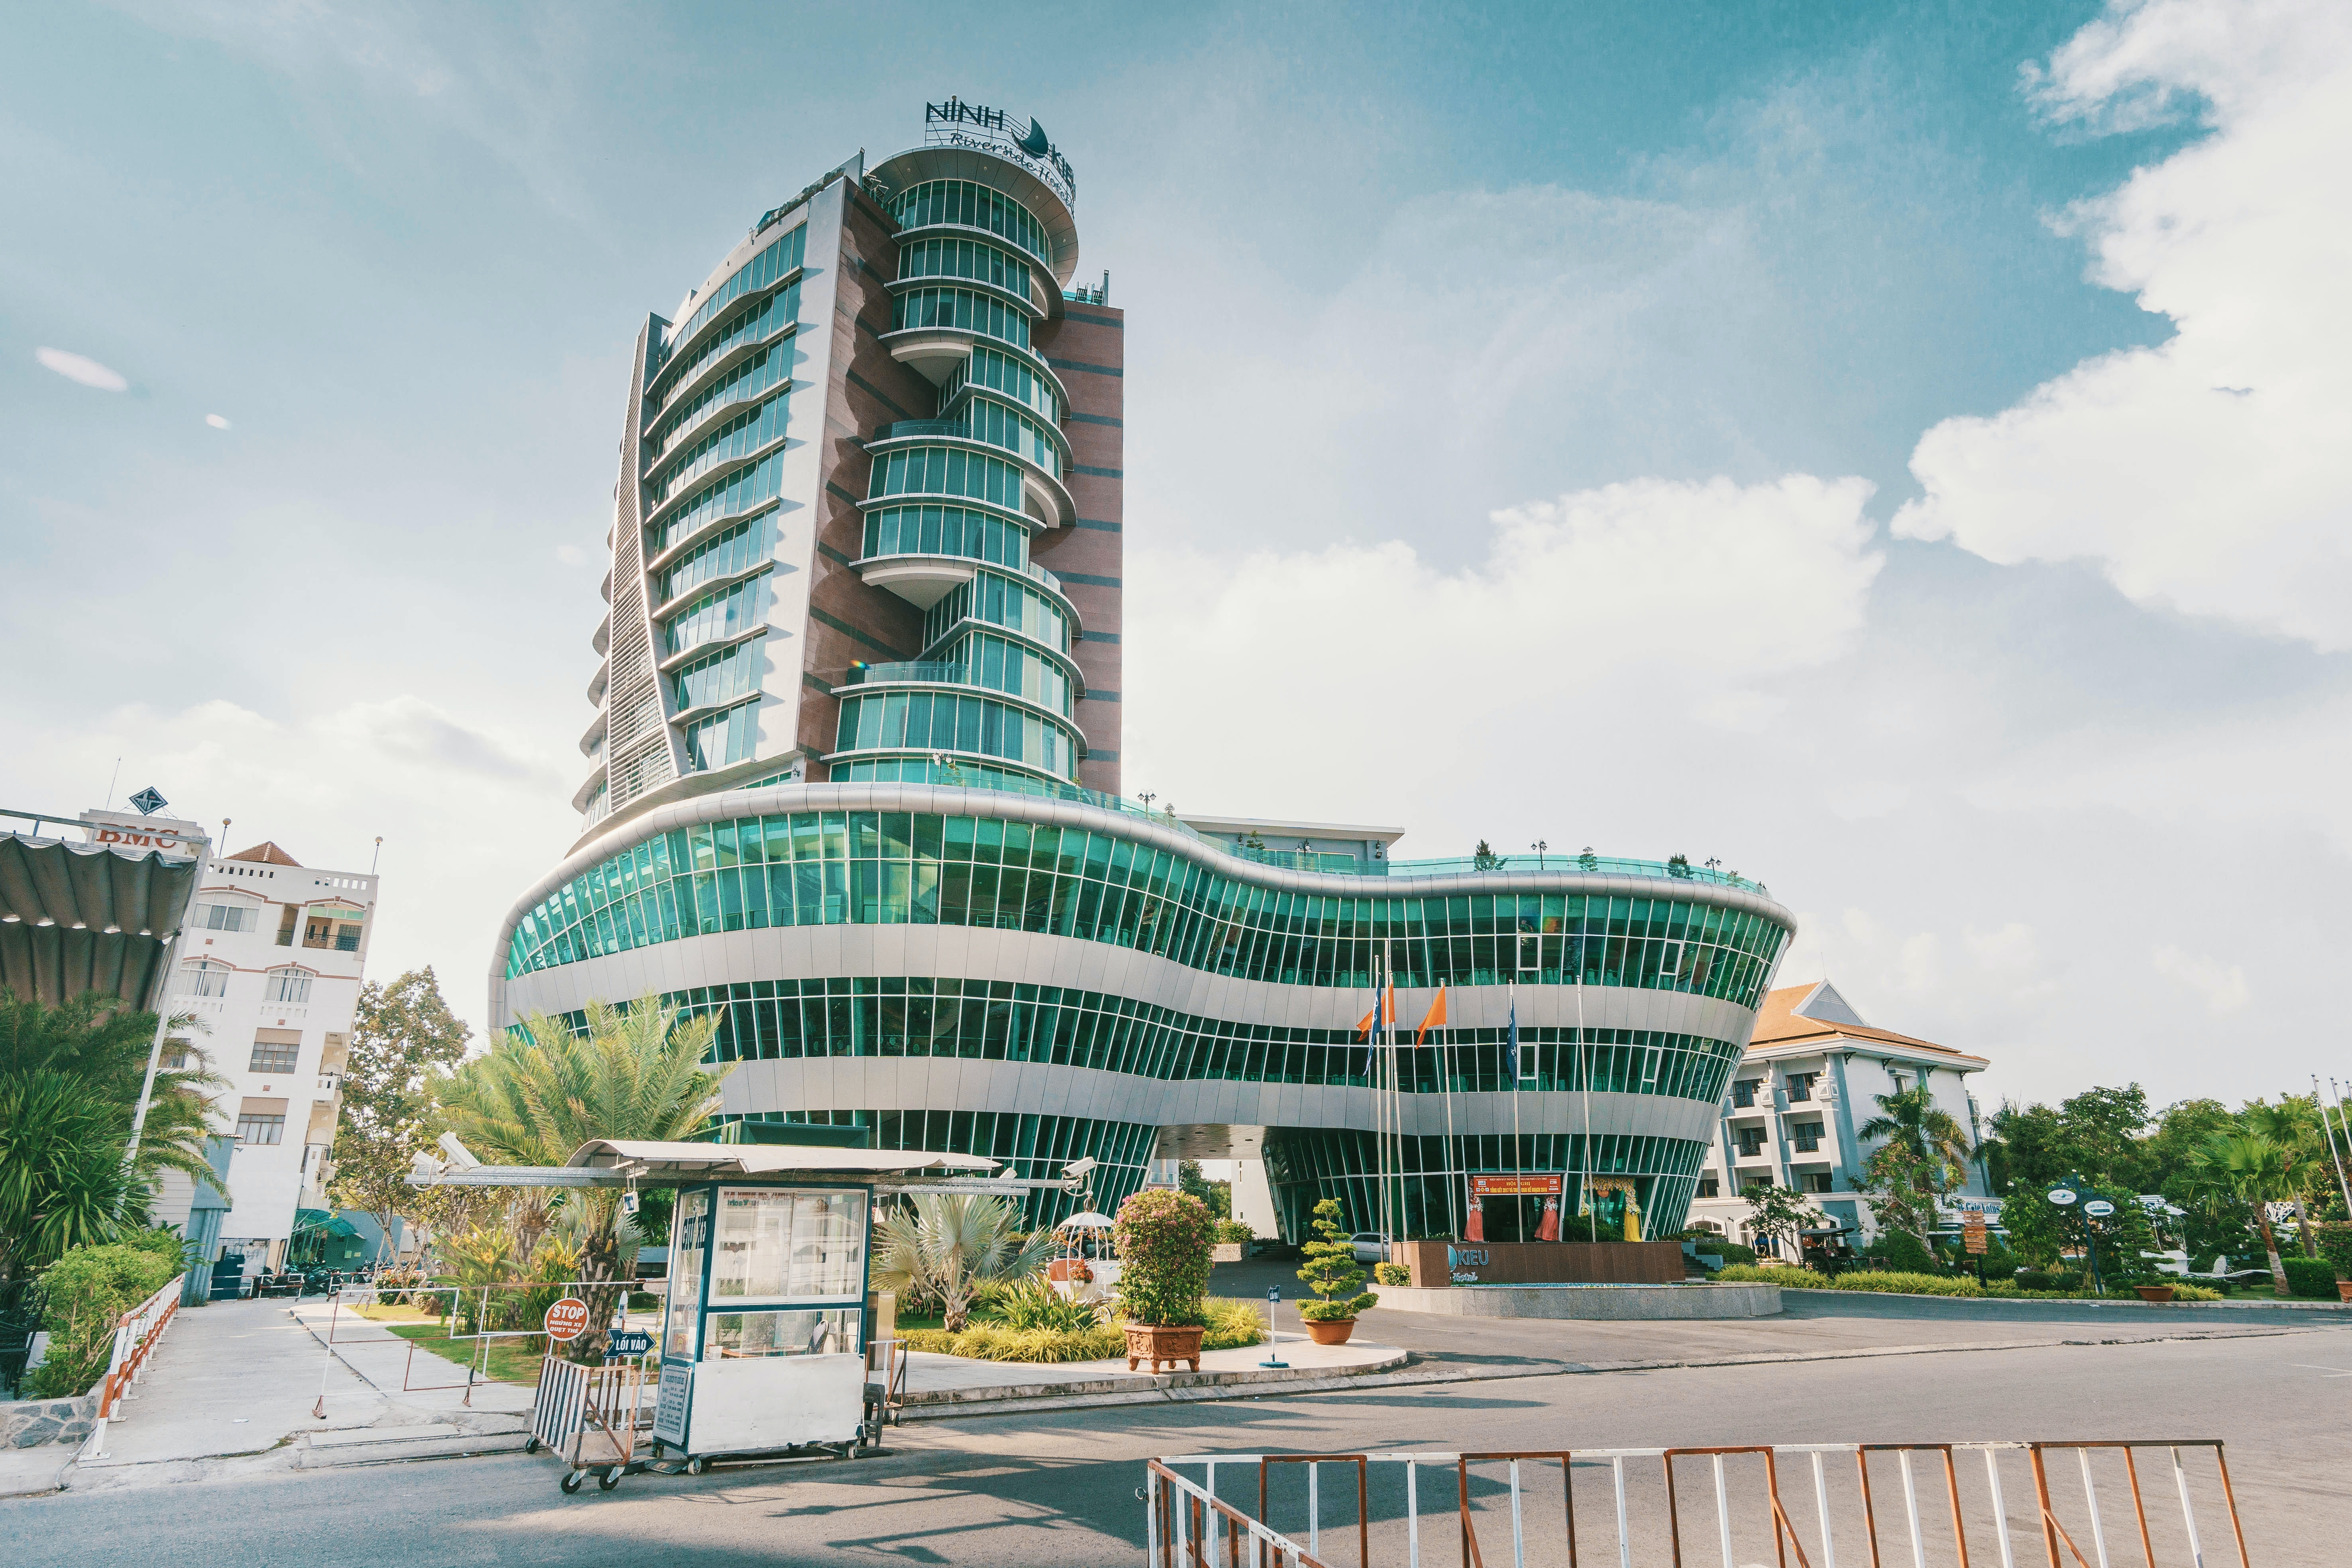

# Project Summary
#### In this report we will investigates Hotel cancellation and their reasons. It consists booking information of two hotels i.e Resort Hotel and City Hotel and various other information. We are going to study relation between various data and find insights from it to provide solution.

## Outline of Project
### 1)Extracting Dataset
### 2)Understanding Variables
### 3)Data Cleaning
### 4)Data Visualisation
### 5)Insights
### 6)Conclusion and Solutions

# Problem Statement

#### This EDA report is on Hotels Booking Dataset where we are going to analyze various elements and find out insights to find reason behind cancellation of booking and provide suggestion to reduce cancellation. The main aim of this project is to find solution to reduce number of cancellations.



# Extracting Dataset

In [115]:
#Importing Libraries
import numpy as np
import pandas as pd
#For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#For Plotting
import plotly.express as px

In [116]:
#Importing Dataset
data=pd.read_csv('Hotel Bookings.csv')

In [117]:
data.shape

(119390, 32)

In [118]:
data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [120]:
#Duplicates Value
data.duplicated().sum()

31994

There are 31994 duplicates value

In [121]:
#Removing Duplicate values
data.drop_duplicates(inplace=True)

In [122]:
data.shape

(87396, 32)

In [123]:
#Missing Value
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


There are 4 Columns that having Null Values-
Children - 4 =>Replace with 0 assuming customer did not have any children
Country - 452 => Replace null value with Others
agent - 12193 =>Replace it with 0 as they have numeric value
company - 82137 =>Replace it with 0 as they have numeric value

# Understanding Variables

In [124]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [125]:
data.describe()

is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             87396.000000          87396.000000  87396.000000   
mean                  1.005263              2.625395      1.875795   
std                   1.031921              2.053584      0.626500   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  87392.000000  87396.000000       87396.000000            87396.000000   
mean       0.138640      0.010824           0.039075                0.030413   
std        0.455881      0.113597           0.193775                0.369145   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    87396.000000     87396.000000  75203.000000   
mean                         0.183990         0.271603     94.138306   
std                          1.731894         0.727245    113.188172   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000     14.000000   
75%                          0.000000         0.000000    240.000000   
max                         72.000000        21.000000    535.000000   

           company  days_in_waiting_list           adr  \
count  5259.000000          87396.000000  87396.000000   
mean    183.081384              0.749565    106.337246   
std     130.557608             10.015731     55.013953   
min       6.000000              0.000000     -6.380000   
25%      47.000000              0.000000     72.000000   
50%     169.000000              0.000000     98.100000   
75%     263.000000              0.000000    134.000000   
max     543.000000            391.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 87396.000000               87396.000000  
mean                      0.084226                   0.698567  
std                       0.281533                   0.831946  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000  

### Variable Description

#### Hotel: (Resort Hotel or City Hotel)
#### is_cancelled : (1) or (0) indicating if the booking is cancelled or not.
#### lead_time: Number of Days between Booking Date and Arrival Date
#### arrival_date_year: Year of Arrival Date
#### arrival_date_month: Month of Arrival Date
#### arrival_date_week_number: Week Number of year for arrival data
#### arrival_date_day_of_month: Day of Arrival Date
#### stays_in_weekend_nights: Number weekends guest stayed or book to stay in hotel
#### stays_in_week_nights: Number of week nights guest stayed or book to stay in hotel
#### adults: Number of Adults
#### children: Number of Children
#### babies: Number of babies	
#### meal : Type of meal categories
#### country: Country of origin
#### distribution_channel: Booking distribution channel "TA" means "Travel Agent" and "TO" means "Travel Operator"
#### is_repeated_guest : (1) or (0) indicating if guest is repeated or not
#### previous_cancellations: Number of Previous Cancellations
#### previous_bookings_not_canceled: Number of previous bookings not cancelled
#### reserved_room_type: Code of Room Type
#### assigned_room_type:  Code of Room assigned
#### booking_changes: Number of Changes made between booking date to check-in date
#### deposit_type: Indicates on if Customer made a deposit to guarantee the booking
#### agent: ID of travel agency
#### company: ID of company/entity that made booking
#### days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed
#### customer_type: Type of booking, assuming one of 4 categories
#### adr: Average Daily Rate as defined  by dividing the sum of all lodging transactions by the total number of staying nights
#### required_car_parking_spaces: Number of Car Parking required by the customer
#### total_of_special_requests: Number of special requests made by the cutomer 
#### reservation_status: Reservation last status assuming one of  3 categories
#### Canceled : Booking canceled by customer 
#### Check-Out - customer has checked in but already departed
#### No-Show - customer did not check-in and did not inform hotel
#### reservation_status_date - Date at which the last status was set


In [126]:
#Checking Unique values in each columns
pd.Series({col:data[col].unique() for col in data})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

# Data Cleaning

In [127]:
#Copy of Original Dataset
df=data.copy()

In [128]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [129]:
#Handling Missing (Null) Values

data['children'].fillna(0,inplace=True)
data['company'].fillna(0,inplace=True)
data['agent'].fillna(0,inplace=True)

#Replacing null values in country with 'Others'
data['country'].fillna('Others',inplace=True)

In [130]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [131]:
#Droping the 'company' column
data.drop(['company'],axis=1,inplace=True)

In [132]:
#Dropping rows where no adults,children,babies are available
temp=data[data['adults']+data['children']+data['babies']==0]
data.drop(temp.index,inplace=True)

In [133]:
#Adding new columns
data['people']=data['adults']+data['babies']+data['children']
data['total_stay']=data['stays_in_weekend_nights']+data['stays_in_week_nights']

In [134]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  \
0                        0                     0       2  ...    0.0   
1                        0                     0       2  ...    0.0   
2                        0                     1       1  ...    0.0   
3                        0                     1       1  ...  304.0   
4                        0                     2       2  ...  240.0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   people total_stay  
0     2.0          0  
1     2.0          0  
2     1.0          1  
3     1.0          1  
4     2.0          2  

[5 rows x 33 columns]

In [135]:
data.shape

(87230, 33)

In [136]:
pd.Series({col:data[col].unique() for col in data})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

### Insights after Data Manipulation are:

#### 1)There are 2 types of hotels can used to find which type of hotel is booked most
#### 2)Guest from different Countries book hotels
#### 3)There are 5 types of meal categories
#### 4)There are 5 types of distribution channels
#### 5)There are 4 types of Customer type
#### 6)adr can be used to find overall average daily rate of different kind of guest

# Data Visualisation

### 1)Which type of hotel is most preffered by the guests? 

In [137]:
#Names of Hotel Type
hotels_name=data['hotel'].unique()

#Value count for each Hotel type
booking= data.hotel.value_counts()

#Creating Donut Chart
fx=px.pie(names=hotels_name,values=booking,hole=0.6,color=hotels_name,
          color_discrete_map={
              'Resort Hotel':'royalblue',
              'City Hotel':'cyan'
          })

#Giving Title and other information
fx.update_traces(textinfo='percent + value')
fx.update_layout(title_text='Hotel Booking',title_x=0.5)

#legend 
fx.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    xanchor='center',
    x=0.5
))

#Display Chart
fx.show()

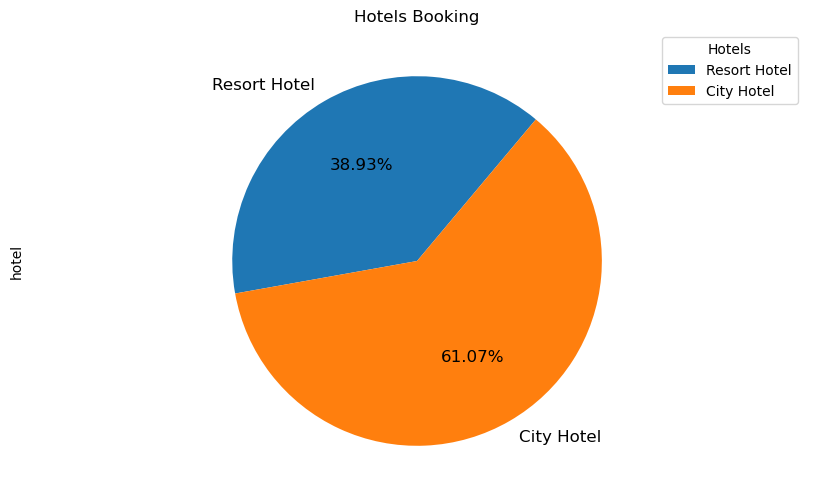

In [138]:
#Simple Pie Chart
hotel_count=data.hotel.value_counts().sort_values()

#Plotting Pie Chart
plt.title('Hotels Booking')
plt.axis('equal')
hotel_count.plot.pie(figsize=(10,6),autopct='%1.2f%%',fontsize=12,startangle=50)
plt.legend(title='Hotels')

### Guests prefer City Hotels most over Resort Hotels. Stakeholders can focus on Resort Hotels to increase overall revenue. Overall there is no such negative impact

### 2)What is percentage of Hotel booking cancellation? 

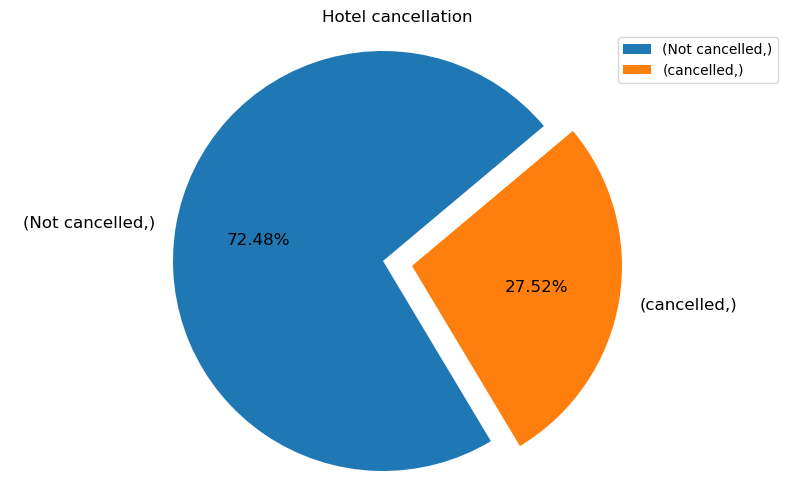

In [139]:
#Finding Hotel Cancellation data
cancel_hotel=pd.DataFrame(data['is_canceled'])
cancel_hotel.replace(0,'Not cancelled',inplace=True)
cancel_hotel.replace(1,'cancelled',inplace=True)
cancel=cancel_hotel.value_counts()

#creating pie chart
cancel.plot.pie(figsize=(10,6),explode=[0.04,0.1],autopct='%1.2f%%', fontsize=12,startangle=40)

plt.title('Hotel cancellation')
plt.axis('equal')
plt.legend()
plt.show()

### Approximate 72% Bookings are not cancelled while 28% bookings are cancel. This will help stakeholders to focus on 28% cancellation and they will try to reduce this number. 

### 3) What type of meal is most selected by guests 

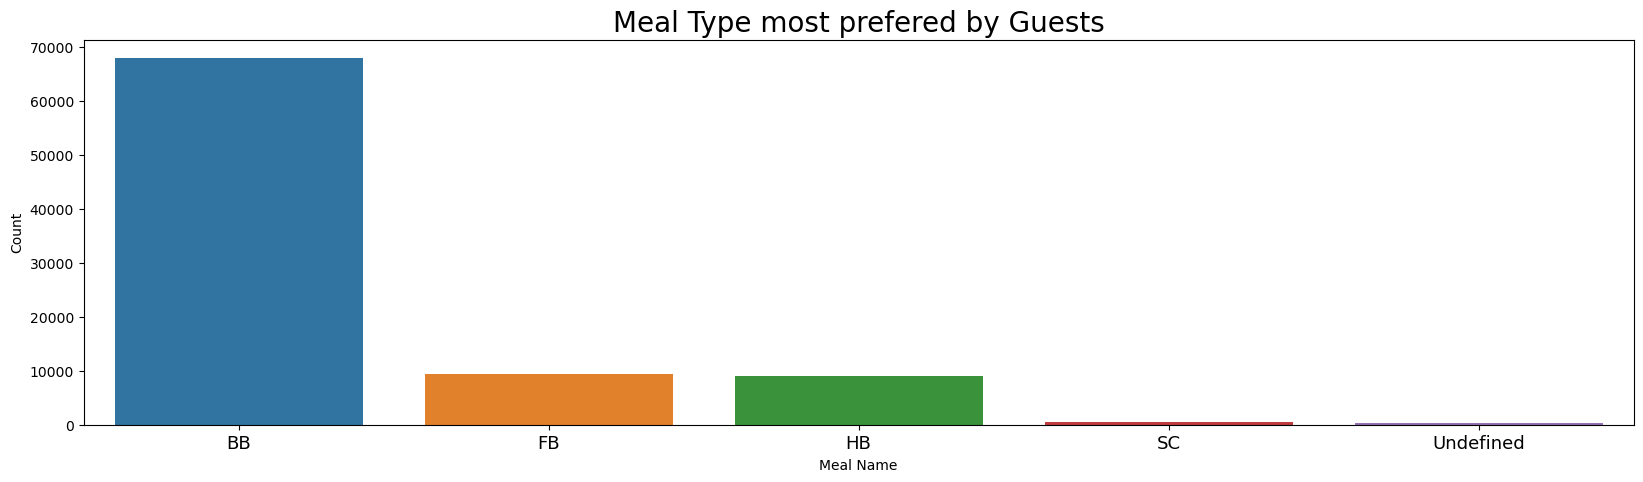

In [140]:
#Counting meal type
meal_count=data.meal.value_counts()

#Name of meals type
meal_type=data['meal'].unique()

#Dataframe of meal_count
meal=pd.DataFrame(zip(meal_type,meal_count),columns=['Meal Name','Count'])

#Creating Bar Graph
plt.figure(figsize=(20,5))
bg=sns.barplot(x='Meal Name',y='Count',data=meal)
bg.set_xticklabels(meal['Meal Name'],fontsize=13)
plt.title('Meal Type most prefered by Guests',fontsize=20)
plt.show()

### Meal Type Description:
#### BB - Bed and Breakfast
#### HB - Half Board
#### FB - Full Board
#### SC - Self Catering

### Bed and Breakfast is a type of meal prefered most by Guests compare to other type. Self Catering is atype which is most least prefered meal type. 

### 4)Which Year has the most bookings ? 

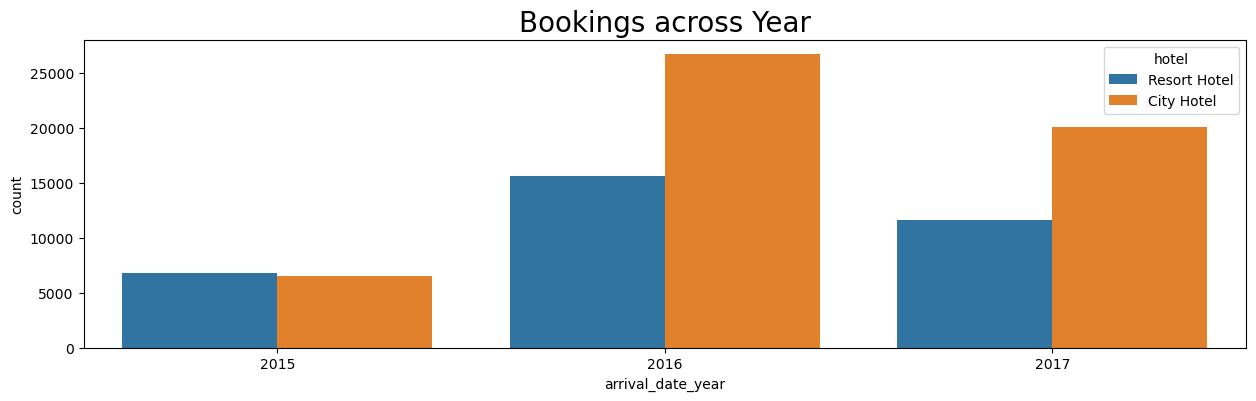

In [141]:
# Creating Bar Chart
plt.figure(figsize=(15,4))
sns.countplot(x=data['arrival_date_year'],hue=data['hotel'])
plt.title("Bookings across Year",fontsize=20)
plt.show()

### Over the years, In 2015 Resort Hotels had slightly more bookings than City Hotels but in next two years City Hotels saw tremendous growth in booking. However, if we compare Resort hotels there is decline in booking for year 2017. 

### 5) Which month has most bookings? 

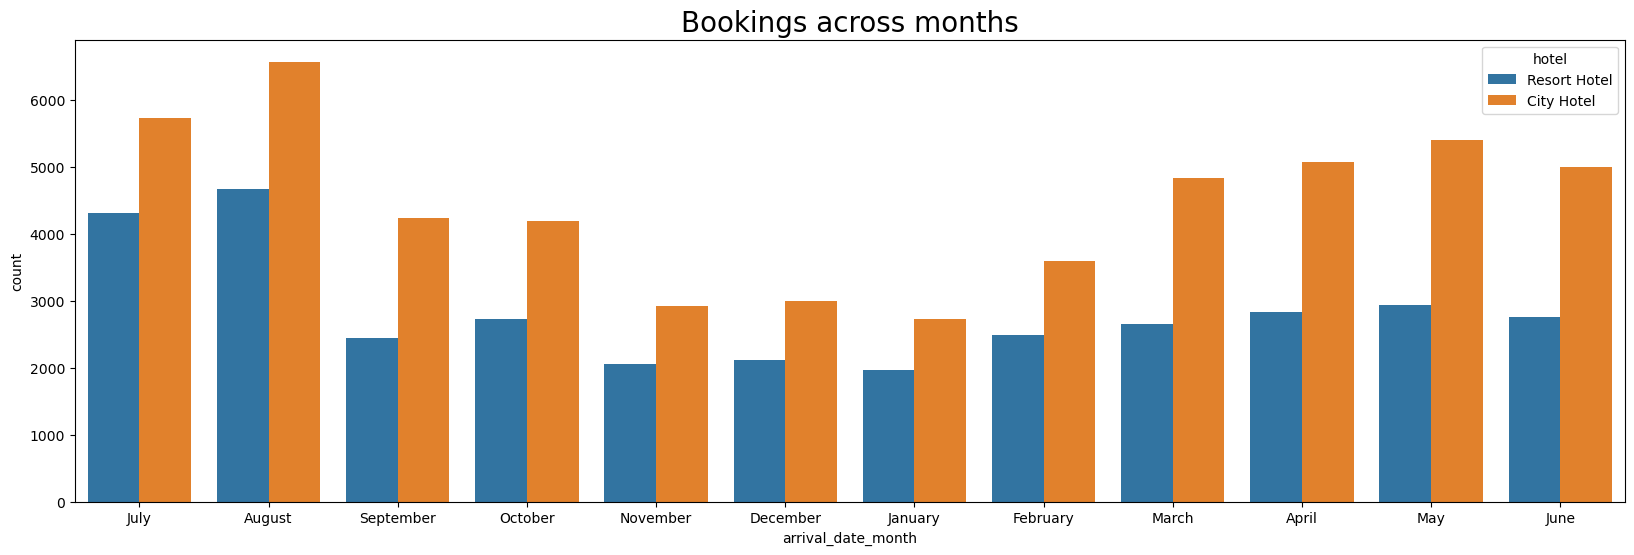

In [142]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['arrival_date_month'],hue=data['hotel'])
plt.title('Bookings across months',fontsize=20)
plt.show()

### In month of August we can see most number of bookings for Both the Hotels. Period between April to August is a peak period when we see huge growth in Hotel bookings, vacations and early monsoon can be reason behind it. However, there is decline in bookings for month November to January. These decline can be reduce by arranging various events on ocassion of Winter Festivals. 

### 6)From Which country most guests come? 

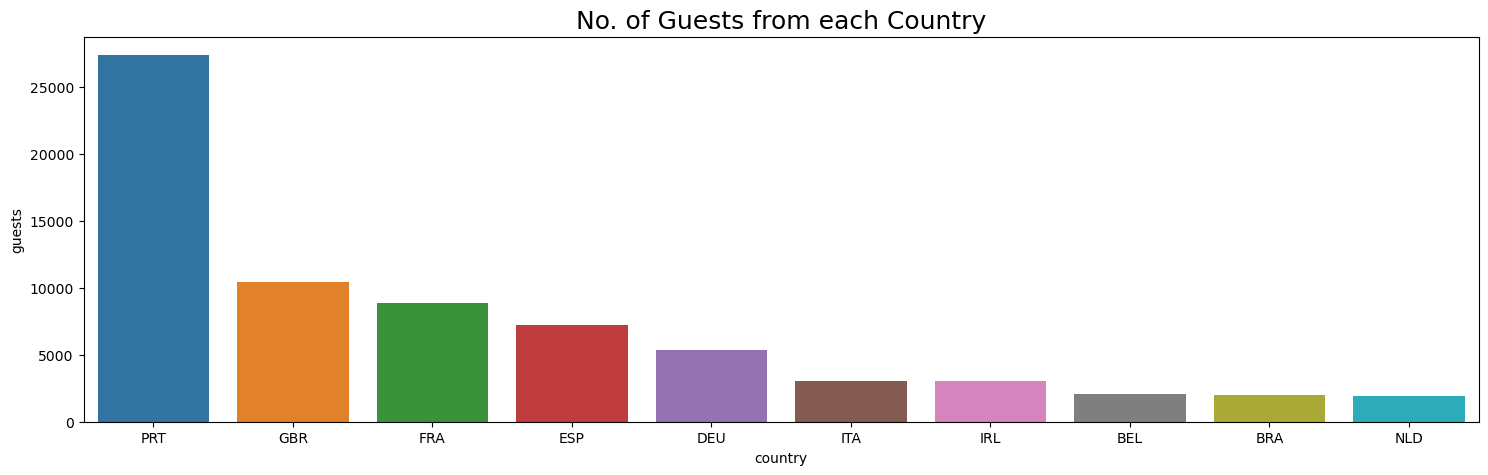

In [143]:
#Creating Dataframe for country count
country=data['country'].value_counts().reset_index().rename(columns={'index':'country','country':'guests'})[:10]

#Creating Bar Graph
plt.figure(figsize=(18,5))
sns.barplot(x=country['country'],y=country['guests'])
plt.title('No. of Guests from each Country',fontsize=18)
plt.show()

   ### We can see that most of the guests are copming from PRT(Portugal). So, we can add more Portugal Cuisine in our meal. To target guests from other countries like Belgium, Brazil, Netherland we can ask guests from these country to recommend our hotel and feedback for us. 

### 7)Which Distribution Channel is most used for booking? 

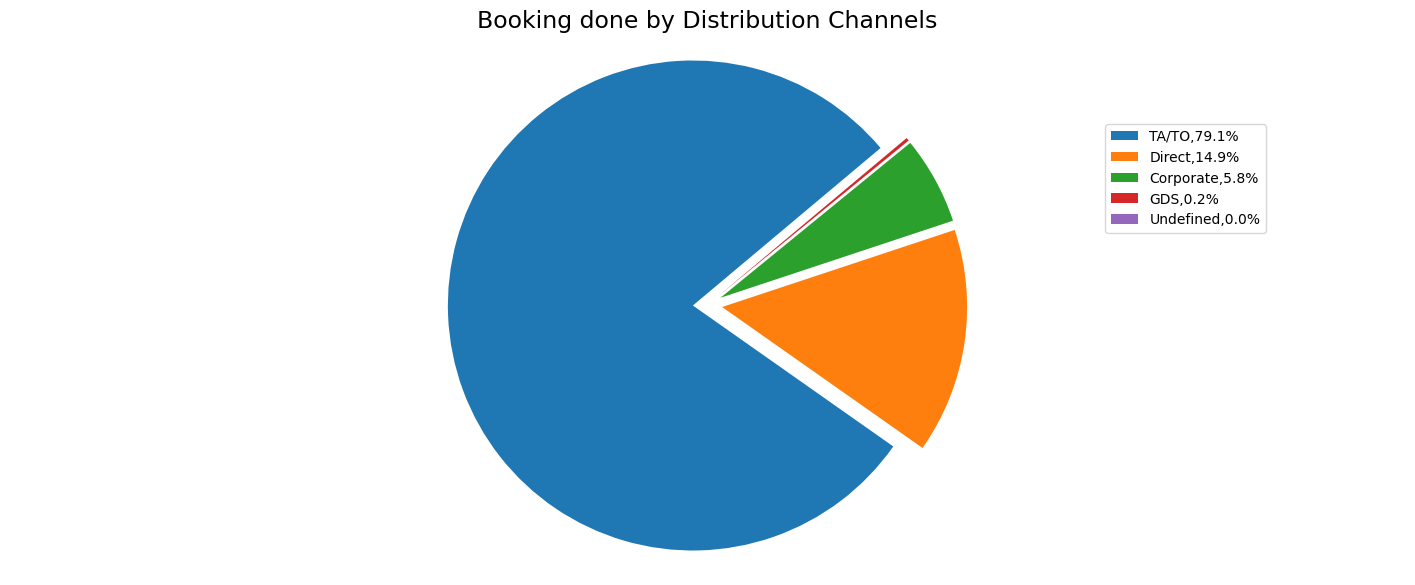

In [144]:
#Creating Dataframe of distribution channel name and count
dc=data['distribution_channel'].value_counts().reset_index().rename(columns={'index':'Channel','distribution_channel':'count'})

#Adding Percentage column to dataset
dc['percentage']=round(dc['count']*100/data.shape[0],1)

#Creating Bar Graph
explode=[0.06,0.06,0.06,0.06,0.06]
plt.figure(figsize=(18,7))
plt.pie(dc['count'],labels=None,explode=explode,startangle=40)

labels=[f'{l},{s}%' for l,s in zip(dc['Channel'].value_counts().index.tolist(),dc['percentage'].values.tolist())]
plt.legend(bbox_to_anchor=(0.78,0.85),loc='upper left',labels=labels)
plt.title('Booking done by Distribution Channels',fontsize=17)
plt.axis('equal')
plt.show()

### Most of the guests used TA/TO i.e Travel Agents or Travel Operators to book Hotel rooms. 

### 8)How much Reserved Room types are assigned to guests ? 

In [145]:
#Creating DataFrame for Assigned Room Type and Reserved Room Type
a_room_type=data['assigned_room_type'].value_counts().reset_index().rename(columns={'index':'room type','assigned_room_type':'count'}).sort_values('room type',axis=0,ascending=True)
r_room_type=data['reserved_room_type'].value_counts().reset_index().rename(columns={'index':'room type','reserved_room_type':'count'}).sort_values('room type',axis=0,ascending=True)
room_type=pd.merge(a_room_type, r_room_type, on='room type', how='outer').rename(columns={'count_x':'assigned','count_y':'reserved'})
room_type.fillna(0,inplace=True)
room_type['reserved']=room_type['reserved'].astype(int)
room_type

room type  assigned  reserved
0          A     46283     56436
1          B      1811       996
2          C      2160       914
3          D     22419     17376
4          E      7190      6036
5          F      3627      2820
6          G      2495      2050
7          H       706       596
8          I       353         0
9          K       185         0
10         L         1         6

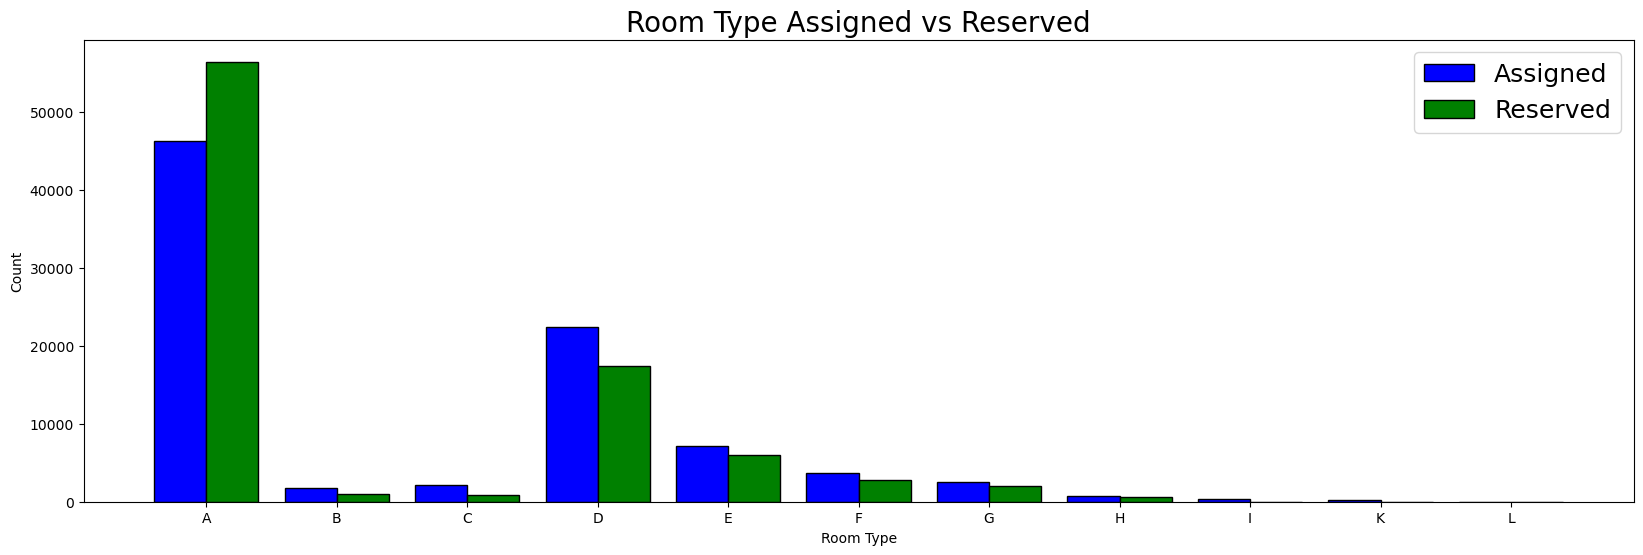

In [146]:
#Creating Bar Graph
n=11
r=np.arange(n)
width=0.4
plt.figure(figsize=(20,6))
plt.bar(r,room_type['assigned'],color='b',width=width,edgecolor='black',label='Assigned')
plt.bar(r+width,room_type['reserved'],color='g',width=width,edgecolor='black',label='Reserved')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title("Room Type Assigned vs Reserved",fontsize=20)
plt.xticks(r+width/2,room_type['room type'])
plt.legend(fontsize=18)
plt.show()

### Room Type A was reserved by many guests but hotel failed to assigned that room for some guests. Stakeholders should focus on this that demand of Room type A is more and it's supply is less. So, more Room type A should arrange to fulfil this demand 

### 9) Top 5 Agents in terms of Booking

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


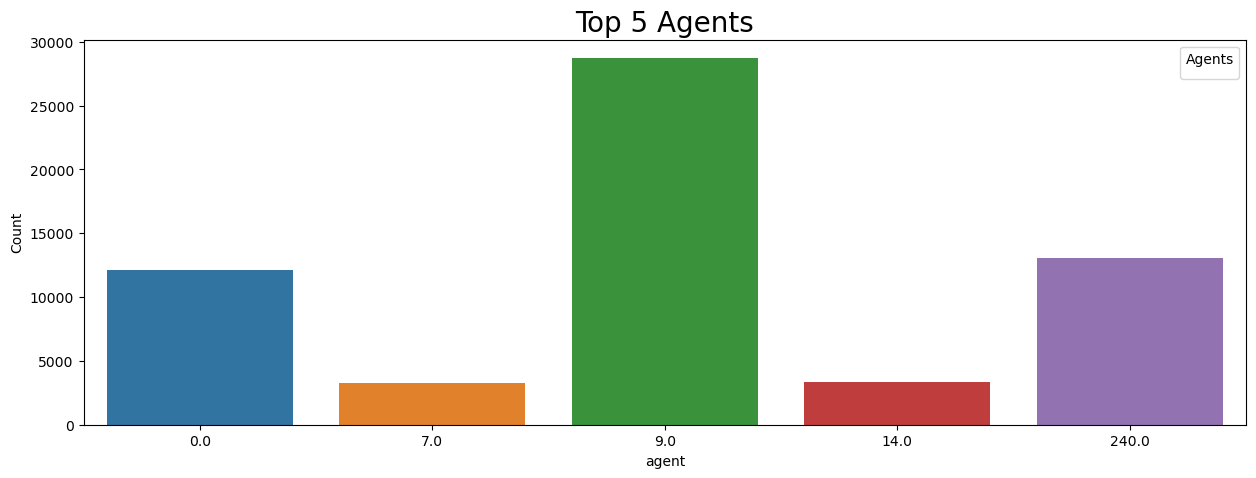

In [147]:
#Top 5 Agents Dataset
top5_agents= data.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count':'Count'}).sort_values(by = 'Count', ascending = False)[:5]

#Creating Bar Graph
plt.figure(figsize=(15,5))
sns.barplot(x=top5_agents['agent'],y=top5_agents['Count'])
plt.legend(title='Agents')
plt.title('Top 5 Agents',fontsize=20)
plt.show()

### Agent 9.0 has most Number of Bookings 

### 10) Percentage of Repeated Guests 

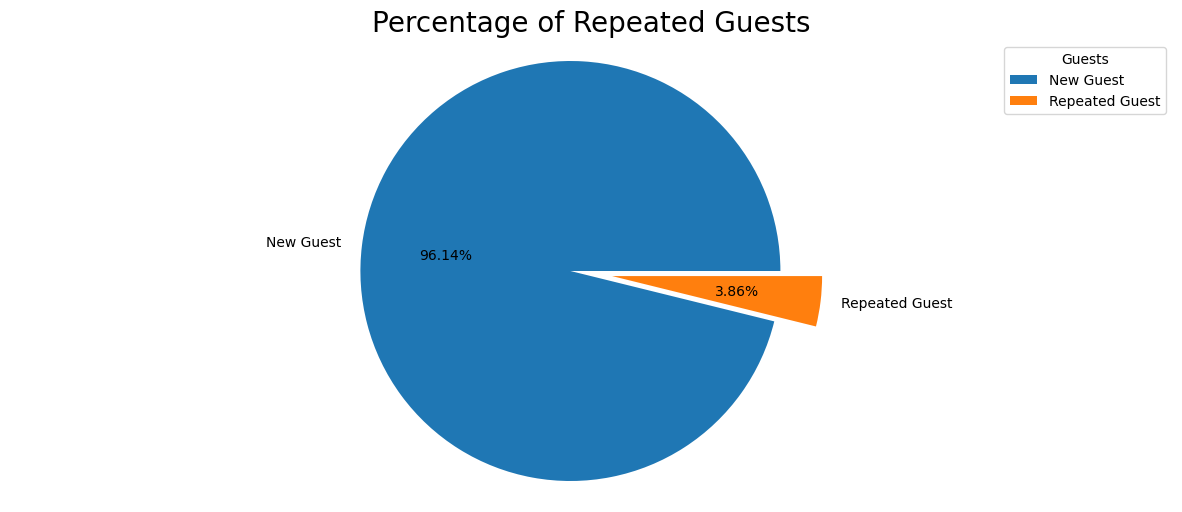

In [148]:
#Creating Dataset
repeated=data['is_repeated_guest'].value_counts().rename(index={0:'New Guest',1:'Repeated Guest'})

#Creating Pie Chart
plt.figure(figsize=(15,6))
plt.pie(repeated,explode=[0,0.2],labels=repeated.index,autopct='%1.2f%%')
plt.title('Percentage of Repeated Guests',fontsize=20)
plt.legend(title='Guests')
plt.axis('equal')
plt.show()

### We can see that 3.86% Guests are Repeated Guests 

### 11)Customer Type with most Booking 

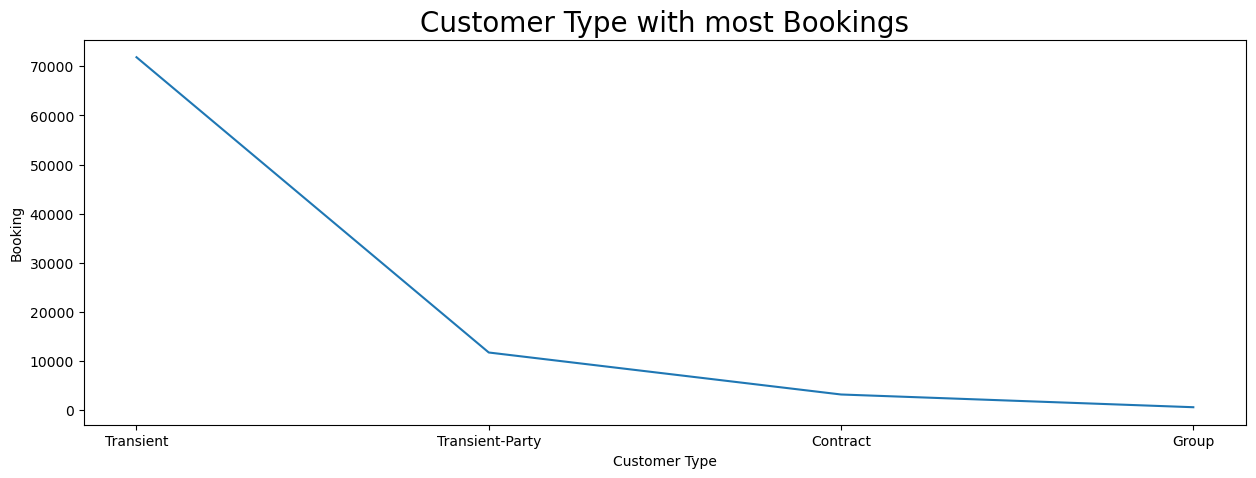

In [149]:
#Creating Dataset
cust=data['customer_type'].value_counts()

#Creating Line Graph
plt.figure(figsize=(15,5))
plt.plot(cust)
plt.title('Customer Type with most Bookings',fontsize=20)
plt.xlabel('Customer Type')
plt.ylabel('Booking')
plt.show()

### Tansient Type of Customers had done most number of booking while other categories should focused by Stakeholders

### 12) Market Segment with most number of Bookings

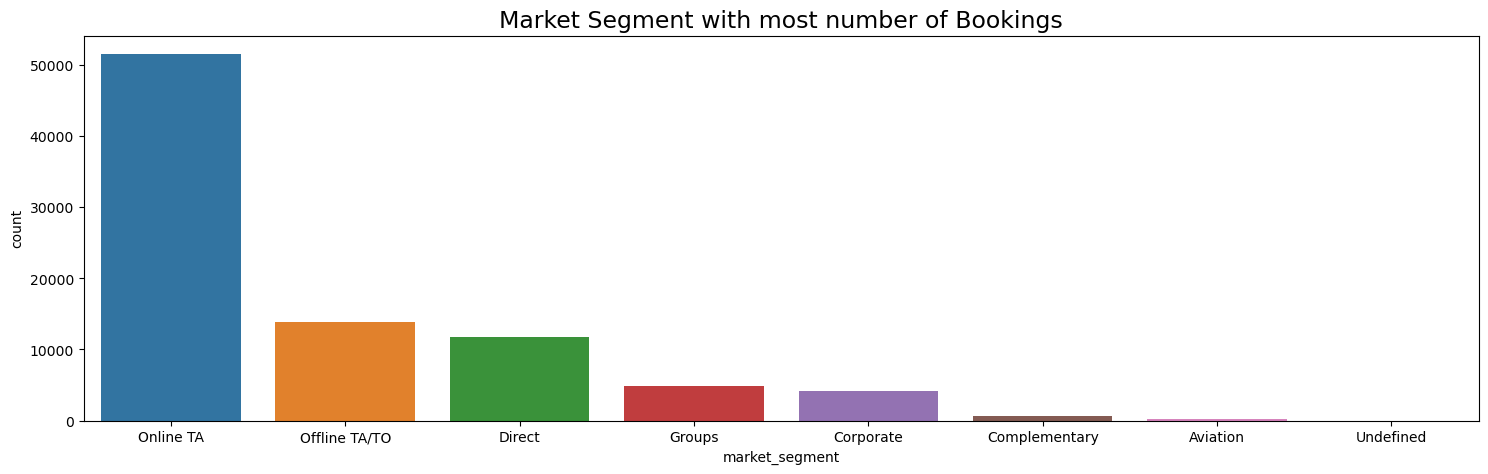

In [150]:
#Creating CountPlot
plt.figure(figsize=(18,5))
sns.countplot(x=data['market_segment'],order=data['market_segment'].value_counts().index)
plt.title('Market Segment with most number of Bookings',fontsize=17)
plt.show()

### Most of the Booking comes from Online TA segment while other market segment has very least count of Booking. Stakeholders should look upon it to increase overall revenue 

### 13) Which Deposit type is most preferred by Guest 

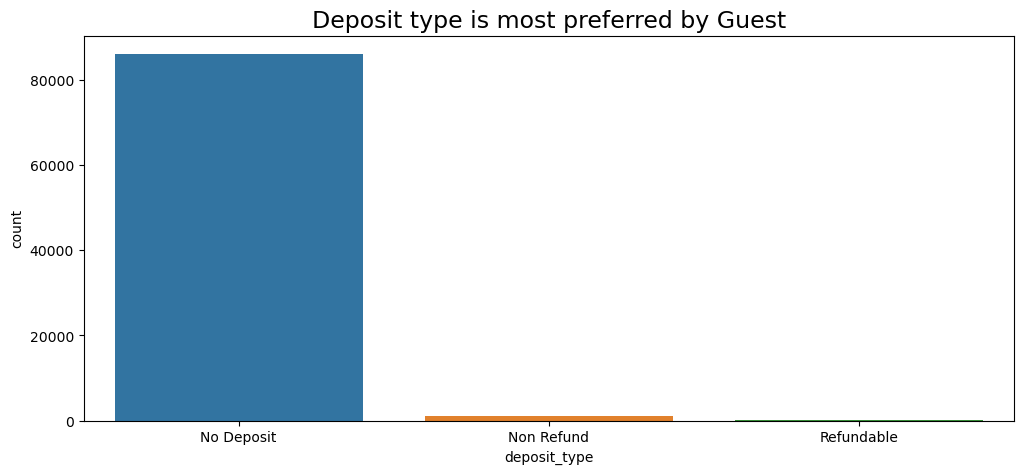

In [151]:
#Creating Count Plot
plt.figure(figsize=(12,5))
sns.countplot(x=data['deposit_type'],order=data['deposit_type'].value_counts().index)
plt.title('Deposit type is most preferred by Guest',fontsize=17)
plt.show()

### It is clear that almost all Guests prefered No Deposit Payment method. So it is better to have this single method in implementation 

### 14) How long people stays in Hotels 

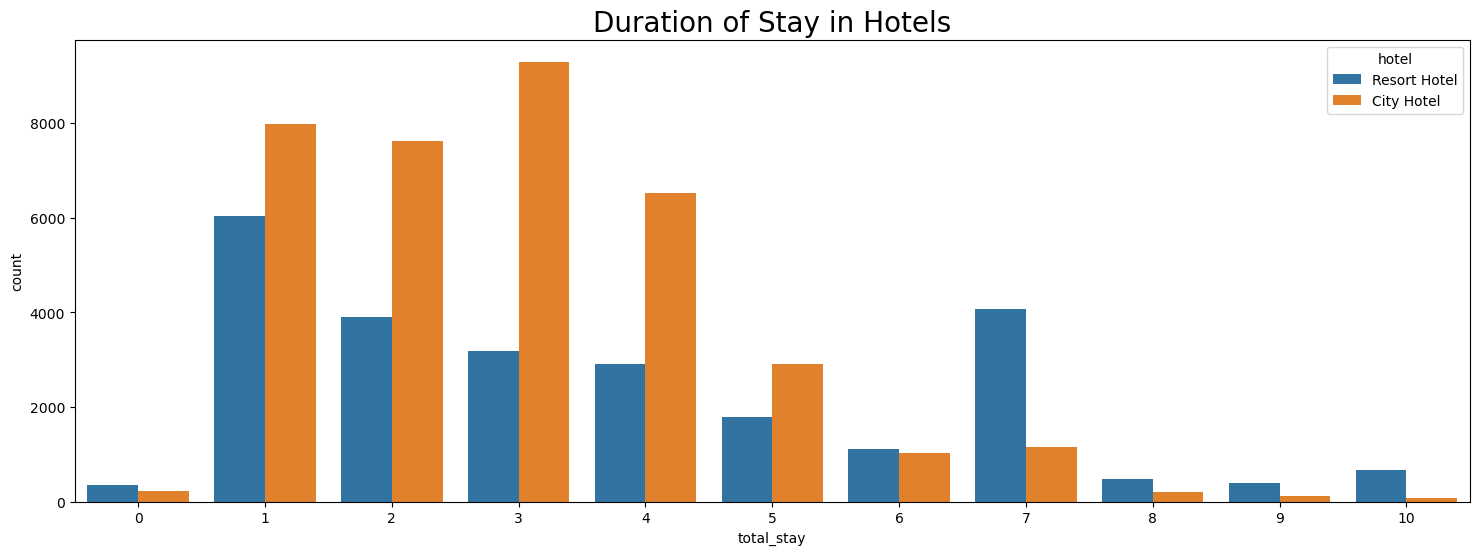

In [152]:
#Creating Dataset 
#Selecting those guests only who not cancelled their booking
no_cancel=data[data['is_canceled']==0]
#For visualisation let us take maximum 10 days into consideration
stay=no_cancel[no_cancel['total_stay'] <= 10]

#Creating Countplot
plt.figure(figsize=(18,6))
sns.countplot(x=stay['total_stay'],hue=stay['hotel'])
plt.title('Duration of Stay in Hotels',fontsize=20)
plt.show()

### Overall Guests stay for short duration in City Hotels and for long duration in Resort Hotels. According to our analysis, Guest mostly stay for 1-4 days in City hotel but for Resort Hotels they stay for 7 days  

### 15)Which Hotel makes most revenue? 

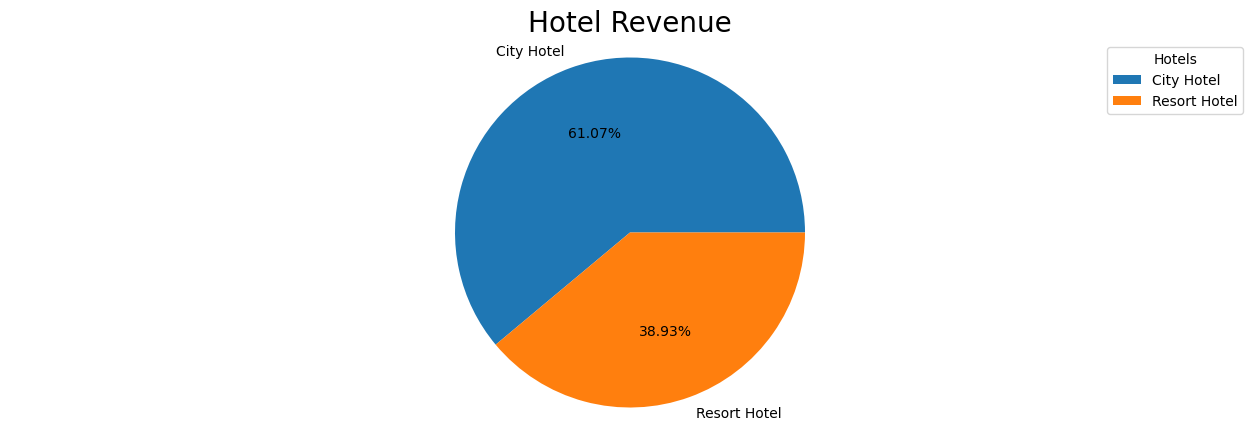

In [153]:
#Creating Dataset
hotel_rev=data.groupby('hotel')['adr'].count()

#Creating Pie Chart
plt.figure(figsize=(16,5))
plt.pie(hotel_rev,labels=hotel_rev.index,autopct='%1.2f%%')
plt.legend(title='Hotels')
plt.title('Hotel Revenue',fontsize=20)
plt.axis('equal')
plt.show()

### City Hotels has 61.07% share of revenue which if we compare with Booking Percentage is less. 

### 16) Waiting Time of Hotels

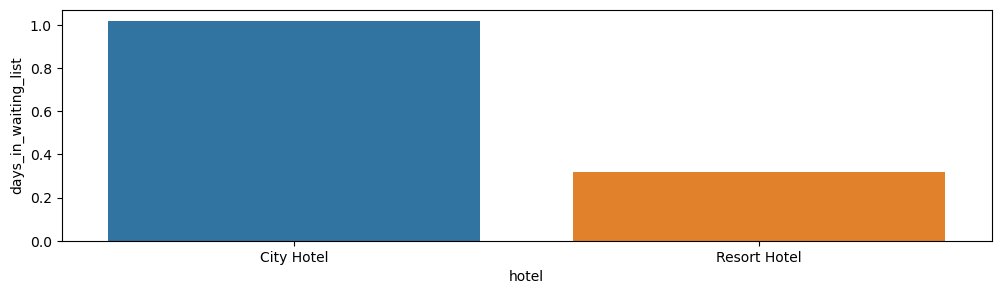

In [154]:
#Creating Dataset
wait=data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

#creating Bar Graph
plt.figure(figsize=(12,3))
sns.barplot(x=wait['hotel'],y=wait['days_in_waiting_list'])
plt.show()

### City Hotels has more waiting time which should reduce by arranging more rooms and accomodations in City Hotels. 

### 17) ADR across Different months 

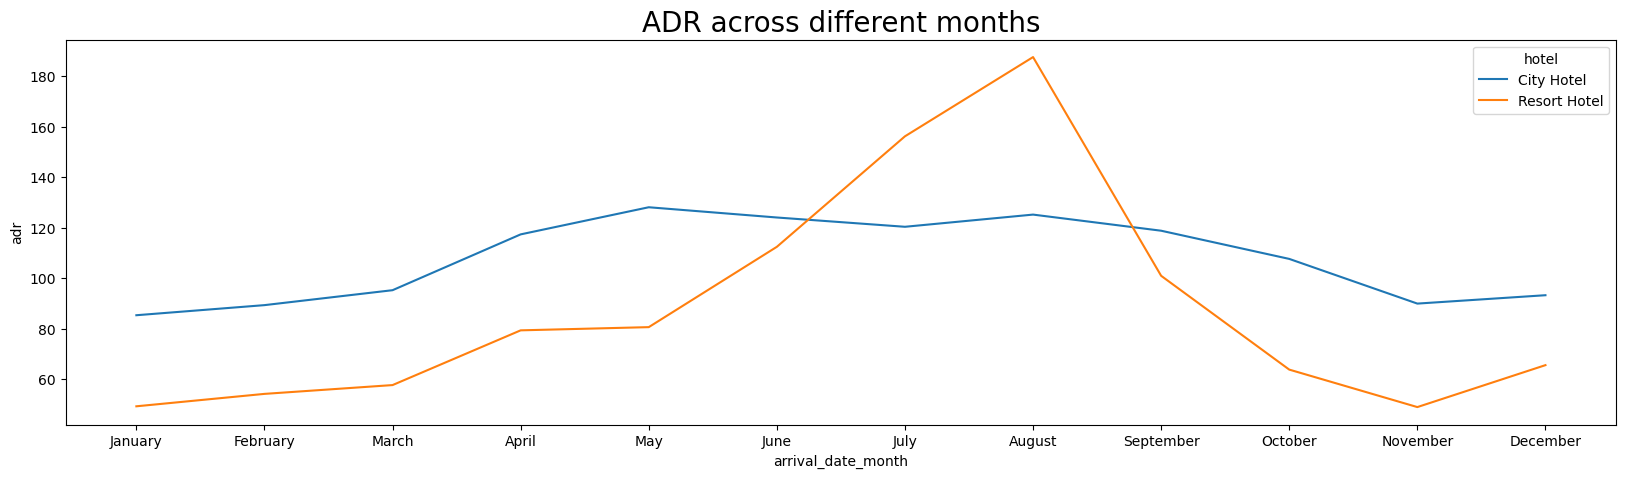

In [159]:
#Creating Dataset
adr_mon=data.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
adr_mon['arrival_date_month']=pd.Categorical(adr_mon['arrival_date_month'],categories=months,ordered=True)

# Sorting the months
adr_mon=adr_mon.sort_values('arrival_date_month')
adr_mon['adr']=round(adr_mon['adr'],2)

#Creating Barplot
plt.figure(figsize=(20,5))
sns.lineplot(x=adr_mon['arrival_date_month'],y=adr_mon['adr'],hue=adr_mon['hotel'])
plt.title('ADR across different months',fontsize=20)
plt.show()


### As we already know that Month of July-August has highest number of booking hence adr in these month is also max. These two months are only months when Resort Hotels has more ADR than City Hotels 

###  18) Distribution Channel with Highest ADR

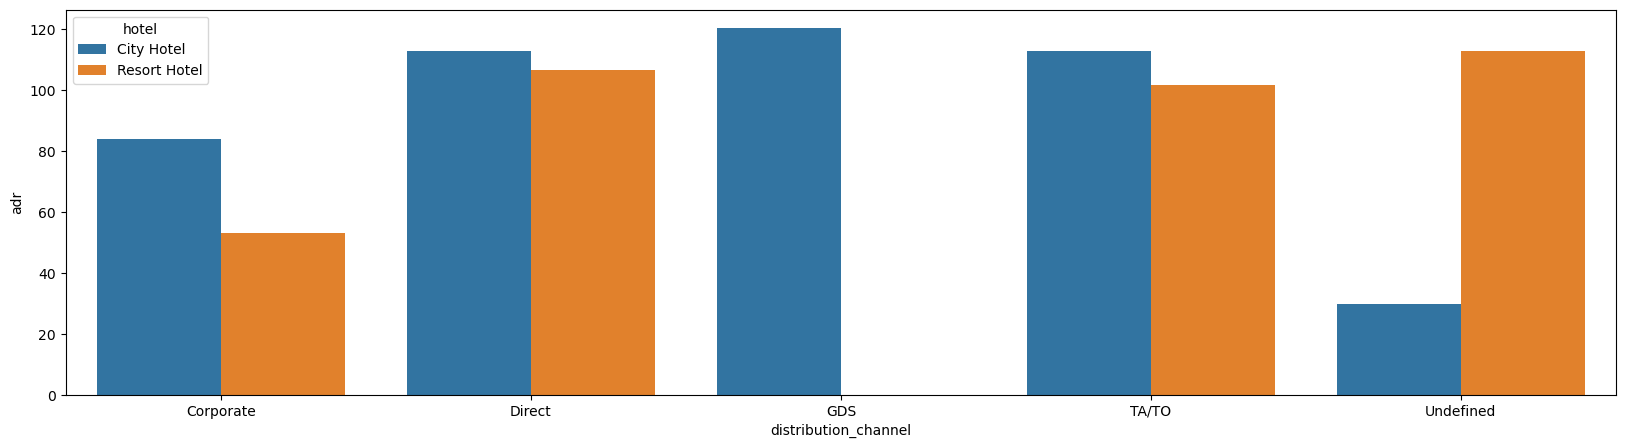

In [163]:
#Creating Dataset
adr_dc=data.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

#Creating LinePlot
plt.figure(figsize=(20,5))
sns.barplot(x=adr_dc['distribution_channel'],y=adr_dc['adr'],hue=adr_dc['hotel'])
plt.show()

### GDS has contributed more in generating the ADR. GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

### Direct- means that bookings are directly made with the respective hotels

### TA/TO- means that booings are made through travel agents or travel operators.

### Undefined- Bookings are undefined. may be customers made their bookings on arrival. 

# 5)Insights

### What People mostly prefered (Demands):
#### 1)City Hotels more than Resort Hotels
#### 2)BB meal Type 
#### 3)Room Type A
#### 4)No Deposit Payment method

### Repeated Guests
#### 3.86%

### Peak Time
#### May-August

### Nationality of most visited guests
#### Portugal

### Method used for booking
#### Travel Agent and Travel Operator

### Max Staying Period
#### City Hotels --> 1-4 Days
#### Resort Hotels --> 1-4 Days sometime 7 Days

### Most waiting Time
#### City Hotels




## 6)Conclusion and Solutions

#### We can conclude that City Hotels are the one which prefered by most of the guests. In some categories City Hotels fails to fulfil demands so that demand should be fulfil so that guests will be satisfied and Percentage of Repeated Guests will increase.
#### Other than Peak Time of month of May-August Hotels should arranged events on ocassion of Winter Festival to attract more guests in that period.
#### Stakeholders should focus on marketing and promotion in other countries like Belgium, Brazil from which least number guests are coming.
#### According to me these all Solutions which Stakeholders should take into consideration.